## Linear, Lasso and Ridge Regression

In [126]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import imageio
%matplotlib inline
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Load and split Dataset 

In [127]:
# get excel file
current_dir = Path.cwd()
file = pd.ExcelFile(current_dir / 'County_Training_Test_Normalized_2.xlsx')

# convert to dataframe
df = file.parse("Training Data")

# get dataset
dataset = df.to_numpy()
#print(dataset)

# get features for datapoints
X = np.delete(dataset, [0,1,7,8], axis=1)
X = X.astype(float)
num_features = X.shape[1]
#print(num_features)
# print(X)

# get labels
# Y = dataset[:,[6]]
Y = dataset[:,[8]]
Y = Y.astype(float)
Y = Y.ravel()
# print(Y)

# get counties
counties = dataset[:,[1]]

# get feature names
new_df = df.drop("County", axis=1)
new_df = new_df.drop("States", axis=1)
new_df = new_df.drop("Percentage Voter Turnout", axis=1)
new_df = new_df.drop("Labels", axis=1)
feature_names = list(new_df.columns.values)




## Name of features

In [128]:
print(feature_names)

['No Voters per Polling Location', 'No Religious Congregations', 'Area per Polling Location', 'Percent Broadband Coverage', 'Purge Rate']


In [129]:
# print(X.shape)
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
# X_train.shape

plt.scatter(features[:, 0], features[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf);
plt.scatter(feat_test[:, 0], feat_test[:, 1], c=Y_test, s=50)

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


## Linear regression - least squares fitting 


In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, Y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

-0.24370006240258363


# Lasso 

In [161]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [162]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [163]:
lasso_regressor.best_score_

-0.24352895067595307

training score for alpha=0.001: 0.01713762201192459
number of features used: for alpha =0.001: 3
training score for alpha=0.0001: 0.017973794395020004
number of features used: for alpha =0.0001: 5
LR training score: 0.01800480479342048


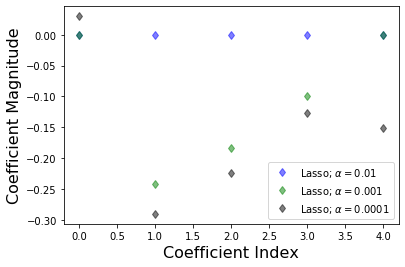

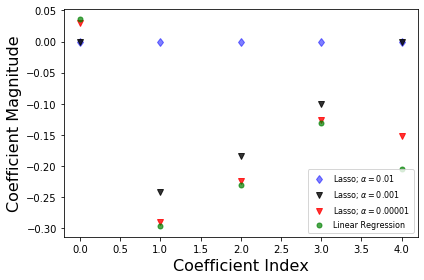

In [164]:
lasso = Lasso()
lasso.fit(X,Y)
train_score=lasso.score(X,Y)
test_score=lasso.score(X_test,Y_test)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X,Y)
train_score001=lasso001.score(X,Y)

coeff_used001 = np.sum(lasso001.coef_!=0)

lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X,Y)
train_score0001=lasso0001.score(X,Y)
train_score0001=lasso0001.score(X,Y)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print("training score for alpha=0.001:", train_score0001)
print("number of features used: for alpha =0.001:", coeff_used0001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X,Y)
train_score00001=lasso00001.score(X,Y)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

########## Linear Regression##############
lr = LinearRegression()
lr.fit(X,Y)
lr_train_score=lr.score(X,Y)
print("LR training score:", lr_train_score) 


plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='green',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)


plt.legend(fontsize=10,loc=4)
plt.show()
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='red',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=8,loc=4)
plt.tight_layout()
plt.show()


## Ridge reression

In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [167]:
ridge_regressor.best_params_

{'alpha': 10}

In [168]:
ridge_regressor.best_score_

-0.2435170359858728

In [169]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), X, Y, scoring="neg_mean_squared_error", cv = 5)


array([-0.23891597, -0.24328772, -0.24574955, -0.24801837, -0.24214612])

In [170]:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), X, Y, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge

array([0.48879031, 0.49324205, 0.49573133, 0.49801443, 0.49208345])

In [172]:
print(rmse_ridge) 



[0.48879031 0.49324205 0.49573133 0.49801443 0.49208345]


Text(0, 0.5, 'rmse')

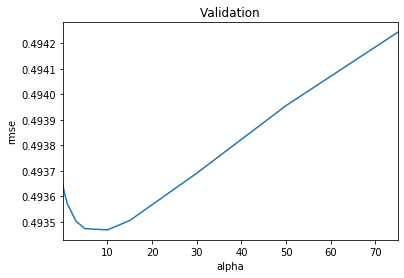

In [143]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")